In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
loan_data = pd.read_csv('loan_data.csv')

In [4]:
loan_data.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [5]:
loan_data.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

Text(0.5, 0, 'FICO')

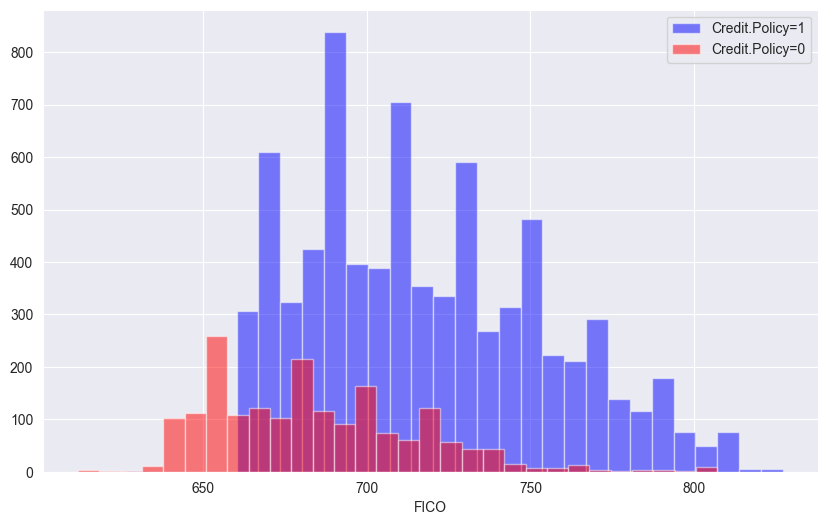

In [6]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot: xlabel='not.fully.paid', ylabel='int.rate'>

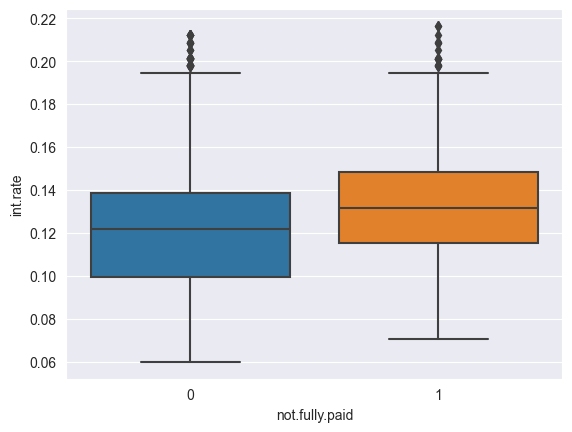

In [5]:
sns.boxplot(x='not.fully.paid', y='int.rate', data=loan_data)

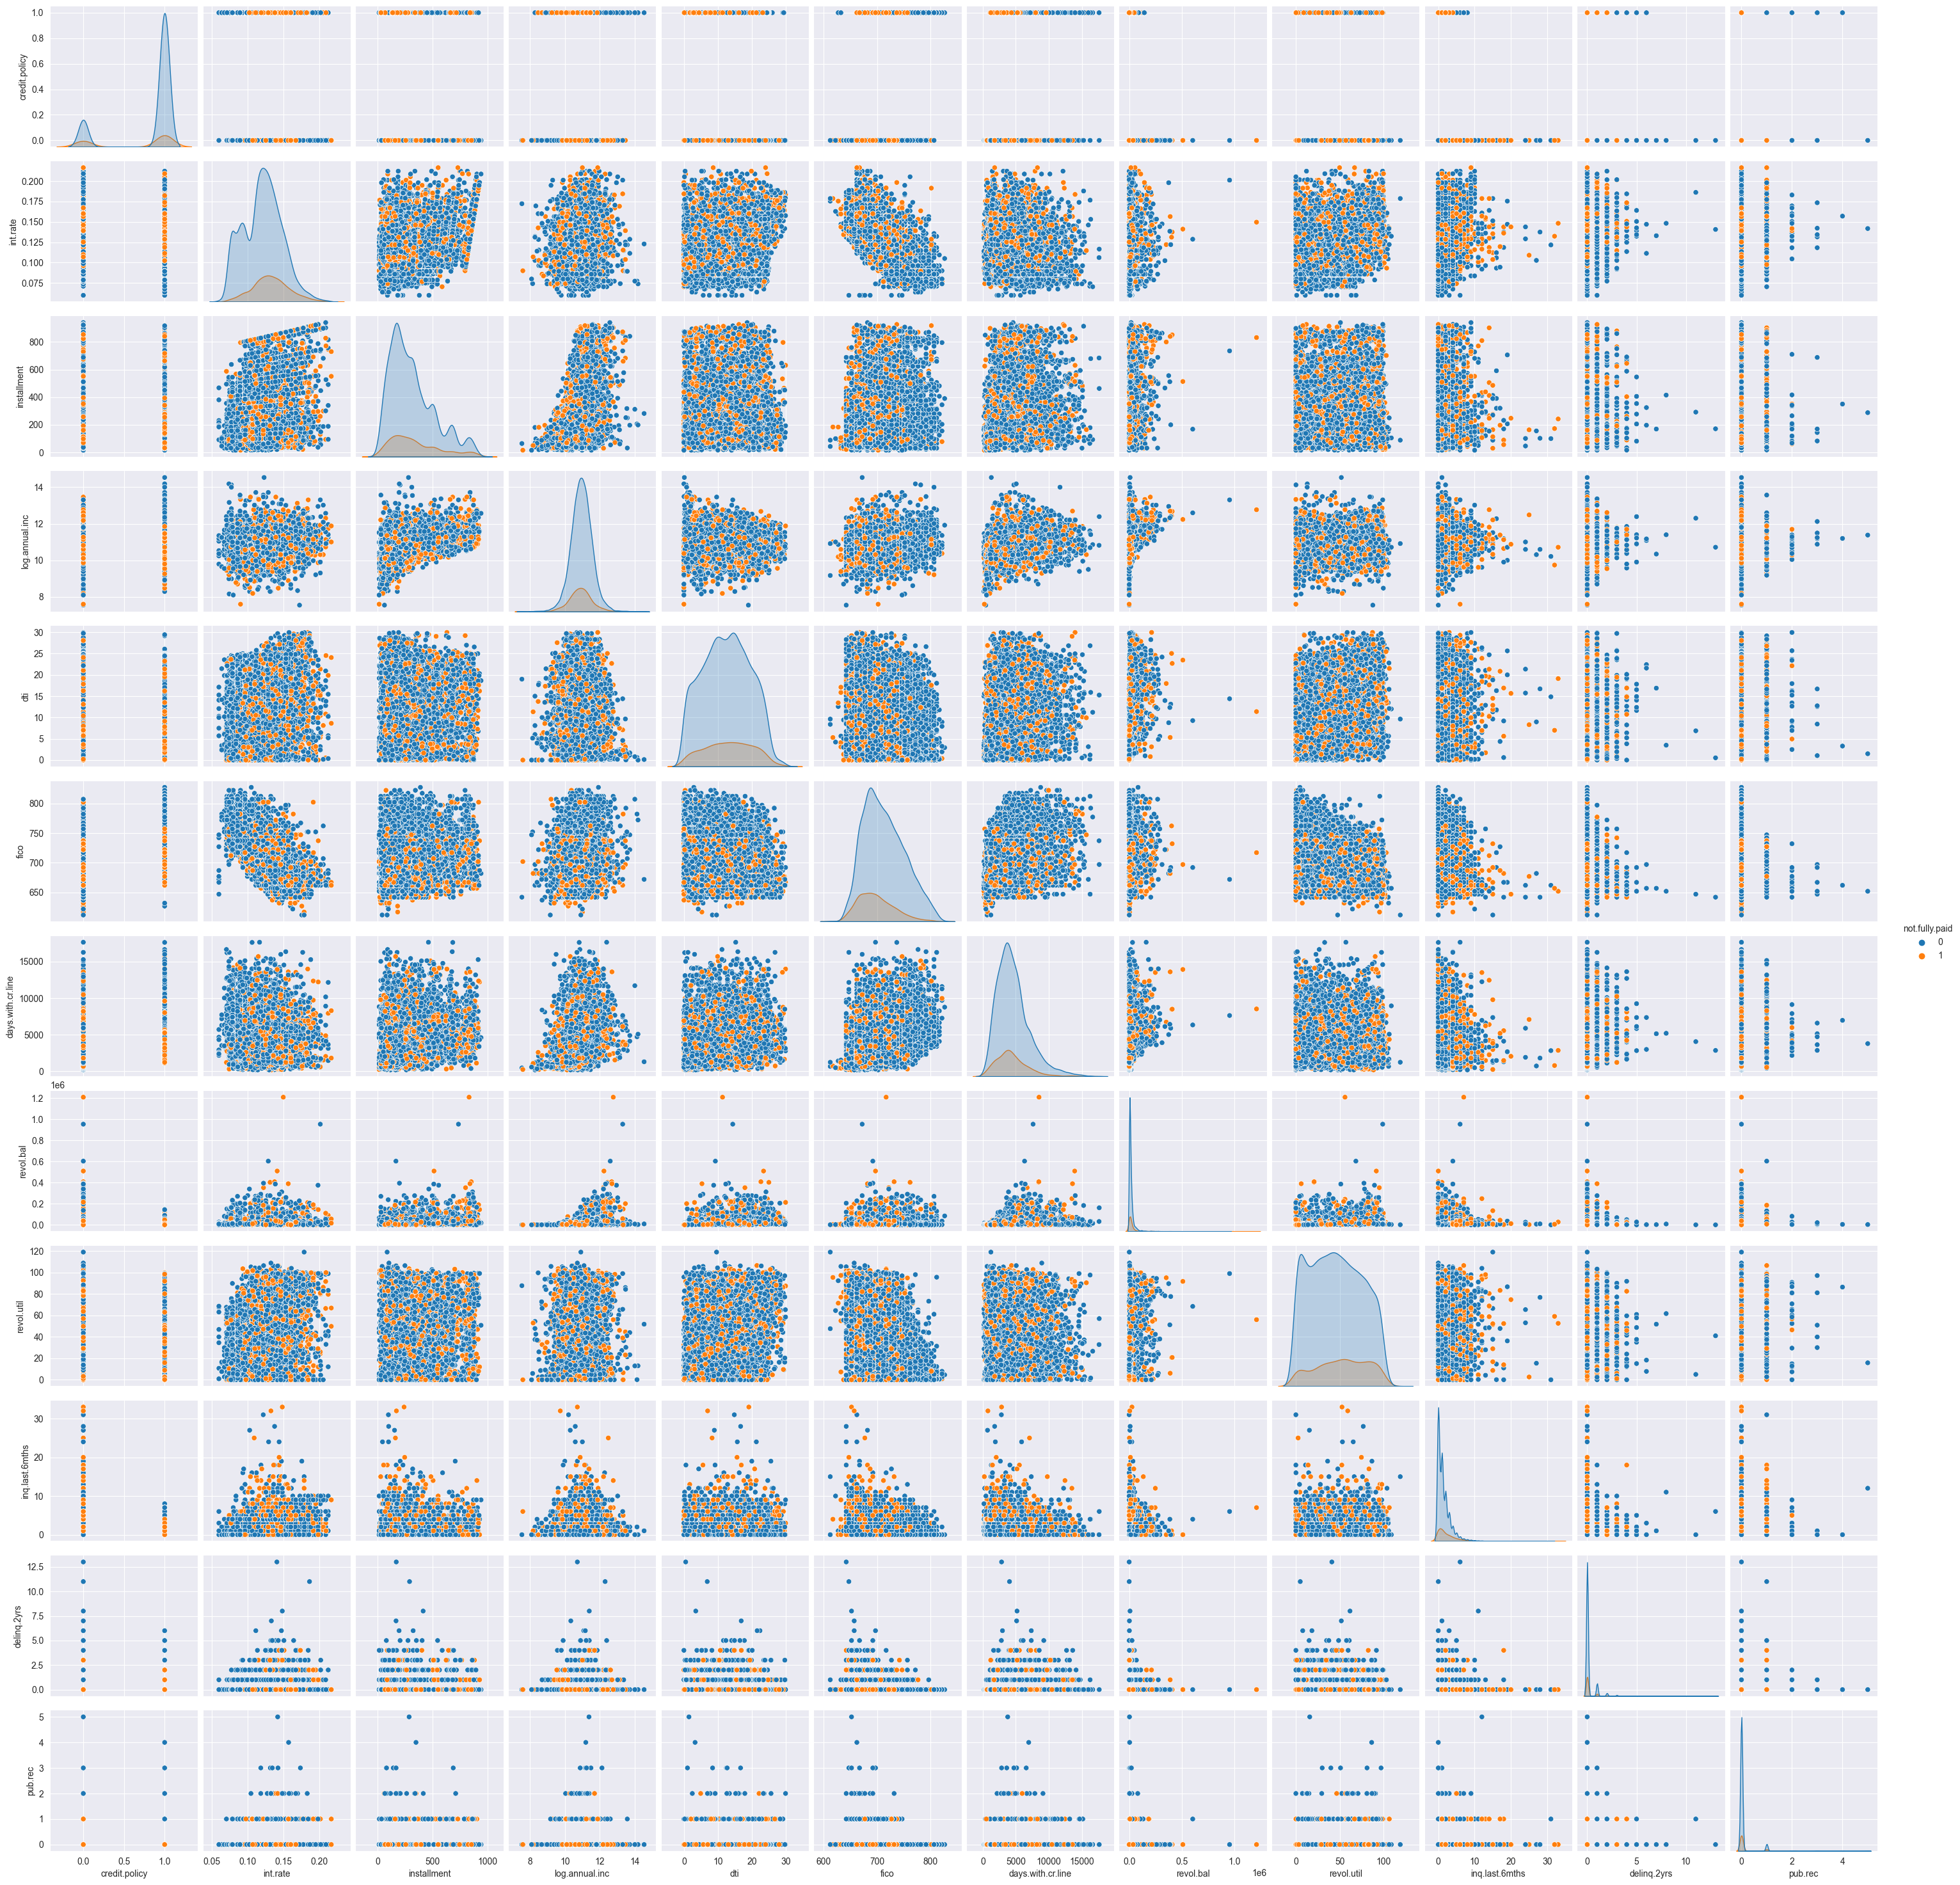

In [9]:
sns.pairplot(data=loan_data, hue='not.fully.paid')

In [12]:
final_loan_data = pd.get_dummies(loan_data,columns=['purpose'], drop_first=True)

In [13]:
final_loan_data.head()

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0                    0                           1   
1        0               0                    1                           0   
2        0               0                    0                           1   
3        0               0                    0                           1   
4        0               0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(final_loan_data.drop('not.fully.paid', axis=1), final_loan_data['not.fully.paid'], test_size=0.33, random_state=101)

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [16]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\belug\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions = log_model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.53      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.69      0.51      0.48      3161
weighted avg       0.80      0.84      0.78      3161



[[2658    8]
 [ 486    9]]


In [22]:

#K Nearest Neighbours
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [25]:
scaler.fit(final_loan_data.drop('not.fully.paid', axis=1))

StandardScaler()

In [27]:
scaler_features = scaler.transform(final_loan_data.drop('not.fully.paid', axis=1))
scaler_features

array([[ 0.49222226, -0.13931753,  2.46309947, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 0.49222226, -0.57886837, -0.43885443, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [-2.03160257,  1.39166043,  0.1569135 , ...,  3.77191529,
        -0.21864717, -0.26285458],
       [-2.03160257,  0.61685894,  2.58060136, ..., -0.2651173 ,
        -0.21864717, -0.26285458]])

In [32]:
loan_data_scaled = pd.DataFrame(scaler_features, columns = final_loan_data.columns[:-1])
loan_data_scaled

credit.policy  int.rate  installment  log.annual.inc       dti  \
0          0.492222 -0.139318     2.463099        0.680388  0.998505   
1          0.492222 -0.578868    -0.438854        0.244031  0.244540   
2          0.492222  0.486484     0.230708       -0.908659 -0.141885   
3          0.492222 -0.813544    -0.757022        0.680388 -0.654697   
4          0.492222  0.743509    -1.043992        0.597961  0.343326   
...             ...       ...          ...             ...       ...   
9573      -2.031603  0.873884     0.123976        2.031030 -0.322023   
9574      -2.031603  0.099083    -0.296481        0.341170 -1.800898   
9575      -2.031603 -0.578868    -1.068670       -0.545694  0.070213   
9576      -2.031603  1.391660     0.156914       -0.182730  0.954924   
9577      -2.031603  0.616859     2.580601        0.540594  0.533633   

          fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0     0.688825           0.432230   0.353732    0.182704       -0.716989   
1    -0.101303          -0.721230   0.495018    1.030602       -0.716989   
2    -0.759742           0.059770  -0.397073   -0.730683       -0.262470   
3     0.030385          -0.745277   0.496321    0.909966       -0.262470   
4    -1.154806          -0.198161  -0.360663   -0.251586       -0.716989   
...        ...                ...        ...         ...             ...   
9573 -1.023118           2.368325   5.879467    1.216726        0.192048   
9574  0.293761          -0.072400  -0.495638   -1.575135        1.555604   
9575 -0.628054          -0.444860  -0.203765    1.244300        2.919159   
9576 -0.496366          -1.105722  -0.501089   -1.502753        1.555604   
9577  0.557137           0.071785   0.621105    0.351594        2.010122   

      delinq.2yrs   pub.rec  not.fully.paid  purpose_credit_card  \
0       -0.299730 -0.237003       -0.389558             1.191856   
1       -0.299730 -0.237003        2.567010            -0.839028   
2       -0.299730 -0.237003       -0.389558             1.191856   
3       -0.299730 -0.237003       -0.389558             1.191856   
4        1.531147 -0.237003        2.567010            -0.839028   
...           ...       ...             ...                  ...   
9573    -0.299730 -0.237003       -0.389558            -0.839028   
9574    -0.299730 -0.237003       -0.389558            -0.839028   
9575    -0.299730 -0.237003       -0.389558             1.191856   
9576    -0.299730 -0.237003       -0.389558            -0.839028   
9577    -0.299730 -0.237003       -0.389558             1.191856   

      purpose_debt_consolidation  purpose_educational  \
0                      -0.192721            -0.265117   
1                      -0.192721            -0.265117   
2                      -0.192721            -0.265117   
3                      -0.192721            -0.265117   
4                      -0.192721            -0.265117   
...                          ...                  ...   
9573                   -0.192721            -0.265117   
9574                   -0.192721            -0.265117   
9575                   -0.192721            -0.265117   
9576                   -0.192721             3.771915   
9577                   -0.192721            -0.265117   

      purpose_home_improvement  purpose_major_purchase  
0                    -0.218647               -0.262855  
1                    -0.218647               -0.262855  
2                    -0.218647               -0.262855  
3                    -0.218647               -0.262855  
4                    -0.218647               -0.262855  
...                        ...                     ...  
9573                 -0.218647               -0.262855  
9574                 -0.218647               -0.262855  
9575                 -0.218647               -0.262855  
9576                 -0.218647               -0.262855  
9577                 -0.218647               -0.262855  

[9578 rows x 18 columns]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(loan_data_scaled, final_loan_data['not.fully.paid'], test_size=0.33, random_state=101)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [107]:
error_rate_list = []
error_rate_RMSE = []

for i in range(1, 40):


    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    error_rate_RMSE.append(metrics.mean_squared_error(y_test, prediction_i))

Text(0, 0.5, 'Error Rate')

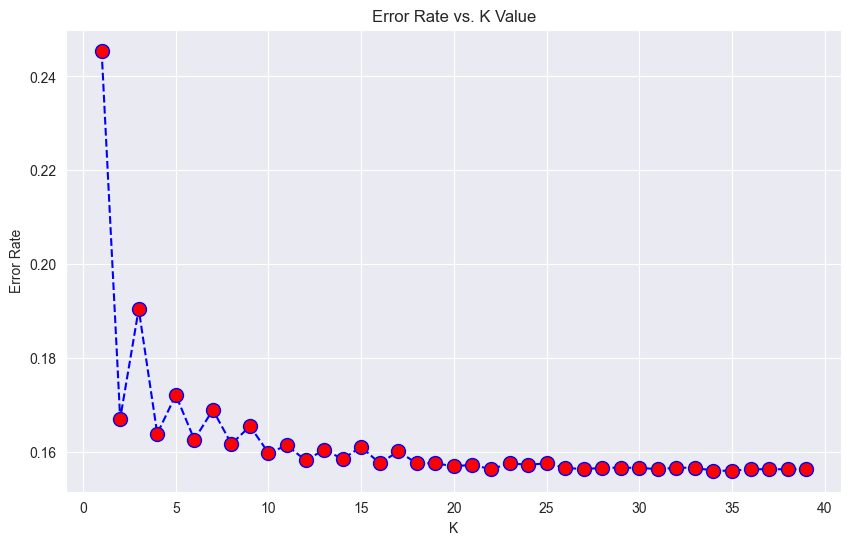

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_RMSE,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
# the ideal K value with the lowest error rate is around 30

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [110]:
predictions = knn.predict(x_test)

In [111]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2666
           1       0.75      0.01      0.01       495

    accuracy                           0.84      3161
   macro avg       0.80      0.50      0.46      3161
weighted avg       0.83      0.84      0.77      3161



[[2665    1]
 [ 492    3]]


In [112]:
# random forest model

x_train, x_test, y_train, y_test = train_test_split(final_loan_data.drop('not.fully.paid', axis=1), final_loan_data['not.fully.paid'], test_size=0.33, random_state=101)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)

In [71]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [75]:
predictions = rfc.predict(x_test)

In [76]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2666
           1       0.56      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.70      0.51      0.48      3161
weighted avg       0.80      0.84      0.78      3161



[[2658    8]
 [ 485   10]]


In [82]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [81]:
model = SVC()


SVC()

In [83]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [90]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [91]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   4.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   3.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   3.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   3.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   3.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   3.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   3.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   5.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   3.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.839 total time=   3.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.838 total time=   4.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [92]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [93]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [113]:
grid_predictions = grid.predict(x_test)

In [114]:
print(confusion_matrix(y_test, grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[2666    0]
 [ 495    0]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2666
           1       0.00      0.00      0.00       495

    accuracy                           0.84      3161
   macro avg       0.42      0.50      0.46      3161
weighted avg       0.71      0.84      0.77      3161



C:\Users\belug\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\belug\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\belug\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,